# DSC 550 

### Week 6:  Exercise 6.2

Author: Kimberly Cable<br>
Date: 7-16-2022

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn import preprocessing
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

### Part 1: PCA and Variance Threshold in a Linear Regression

**1. Import the housing data as a data frame and ensure that the data is loaded properly.**

In [2]:
# Import Housing Prices data
housing_df = pd.read_csv("housing_train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.shape

(1460, 81)

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**2. Drop the "Id" column and any features that are missing more than 40% of their values.**

In [5]:
# Check for features with more than 40% of their values missing
percent_missing = housing_df.isnull().sum() * 100 / len(housing_df)
missing_value_df = pd.DataFrame({'column_name': housing_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing'] > 40]

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [6]:
# drop column Id
housing_df.drop(['Id'], axis = 1, inplace = True)

# Drop all columns containing more than 40% of missing data
housing_df.dropna(how = 'all', axis = 1, thresh = housing_df.shape[0] * 0.6, inplace = True)

# Check shape
housing_df.shape

(1460, 75)

In [9]:
# Check to make sure correct columns were dropped
housing_df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SalePrice', 'S

**3. For numerical columns, fill in any missing data with the median value**

In [10]:
# Select all numeric features
numeric_columns = housing_df.select_dtypes(include = np.number).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
housing_df.fillna(housing_df[numeric_columns].median(), inplace = True)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**4. For categorical columns, fill in any missing data with the most common value (mode).**

In [12]:
# Select all categorical features
categorical_columns = housing_df.select_dtypes(include = 'object').columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
housing_df.fillna(housing_df[categorical_columns].mode(), inplace = True)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
# Check for empty
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

**5. Convert the categorical columns to dummy variables.**

In [15]:
housing_cleaned = pd.get_dummies(housing_df, columns = categorical_columns)
housing_cleaned.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


**6. Split the data into a training and test set, where the SalePrice column is the target.**

In [16]:
# Dependent variable
y = housing_cleaned['SalePrice'].values

# Independent variables
X = housing_cleaned.loc[:, housing_cleaned.columns != 'SalePrice'].values

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [17]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (1168, 270)
X_test: (292, 270)
y_train: (1168,)
y_test: (292,)


**7. Run a linear regression and report the R2-value and RMSE on the test set.**

In [18]:
regr_model = LinearRegression().fit(X_train, y_train)

In [19]:
# Create test prediction
y_test_predict = regr_model.predict(X_test)

In [20]:
# R2
r2_score_test = r2_score(y_test, y_test_predict)
print(f"Test R2: {r2_score_test}")

# Calculate Root Mean Squared Error (RMSE) Test
rmse_test = mean_squared_error(y_test, y_test_predict, squared = False)
print(f"Test RMSE: {rmse_test}")

Test R2: 0.8855885429043013
Test RMSE: 26902.859645508226


**8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).**

In [21]:
# Normalize feature set
sc = preprocessing.StandardScaler()

X_train_normal = sc.fit_transform(X_train)
X_test_normal = sc.fit_transform(X_test)

In [22]:
pca = PCA(n_components = 0.90, whiten = True)

X_train_pca = pca.fit_transform(X_train)

**9. How many features are in the PCA-transformed matrix?**

In [23]:
print(f"Original: {X_train.shape}")
print(f"PCA: {X_train_pca.shape}")

Original: (1168, 270)
PCA: (1168, 1)


There is only 1 feature in the PCA transformed matrix

**10. Transform but DO NOT fit the test features with the same PCA.**

In [24]:
X_test_pca = pca.transform(X_test)

**11. Repeat step 7 with your PCA transformed data.**

In [26]:
regr_model_pca = LinearRegression().fit(X_test_pca, y_test)

In [27]:
# Create test prediction
y_test_pca_predict = regr_model_pca.predict(X_test_pca)

In [28]:
# R2
r2_score_pca_test = r2_score(y_test, y_test_pca_predict)
print(f"Test R2: {r2_score_pca_test}") 

# Calculate Root Mean Squared Error (RMSE) Test
rmse_pca_test = mean_squared_error(y_test, y_test_pca_predict, squared = False)
print(f"Test RMSE: {rmse_pca_test}")

Test R2: 0.06705335369537957
Test RMSE: 76823.14660684353


**12. Take your original training features (from step 6) and apply a min-max scaler to them.**

In [29]:
# Normalize feature set
mms = preprocessing.MinMaxScaler()

X_train_minmax = mms.fit_transform(X_train)
X_test_minmax = mms.fit_transform(X_test)

**13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).**

In [30]:
thresholder = VarianceThreshold(threshold = 0.1)

In [31]:
features_high_variance = thresholder.fit_transform(X_train_minmax)

**14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.**

In [32]:
X_test_minmax = thresholder.transform(X_test_minmax)

**15. Repeat step 7 with the high variance data.**

In [34]:
regr_model_minmax = LinearRegression().fit(X_test_minmax, y_test)

In [35]:
# Create test prediction
y_test_minmax_predict = regr_model_minmax.predict(X_test_minmax)

In [36]:
# R2
r2_score_minmax_test = r2_score(y_test, y_test_minmax_predict)
print(f"Test R2: {r2_score_minmax_test}") 

# Calculate Root Mean Squared Error (RMSE) Test
rmse_minmax_test = mean_squared_error(y_test, y_test_minmax_predict, squared = False)
print(f"Test RMSE: {rmse_minmax_test}")

Test R2: 0.7686304918723621
Test RMSE: 38257.514297481284


**16. Summarize your findings.**

In [37]:
print(f"Original Data:")
print(f"Test R2: {r2_score_test}")
print(f"Test RMSE: {rmse_test}")
      
print("\nPCA Data:")
print(f"Test R2: {r2_score_pca_test}")
print(f"Test RMSE: {rmse_pca_test}")
      
print("\nMin-Max Data:")
print(f"Test R2: {r2_score_minmax_test}")
print(f"Test RMSE: {rmse_minmax_test}")

Original Data:
Test R2: 0.8855885429043013
Test RMSE: 26902.859645508226

PCA Data:
Test R2: 0.06705335369537957
Test RMSE: 76823.14660684353

Min-Max Data:
Test R2: 0.7686304918723621
Test RMSE: 38257.514297481284


Looking at the R2, using all the features had a higher percentage meaning the model fit better. The RMSE for all the data is $26,902 off the sales price. A lower dollar amount compared to the other two models.

### Part 2: Categorical Feature Selection

Based on several categorical features, you will predict whether of not a mushroom is edible or poisonous.

**1. Import the data as a data frame and ensure it is loaded correctly.**

In [38]:
# Import Housing Prices data
mushroom_df = pd.read_csv("mushrooms.csv")
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
mushroom_df.shape

(8124, 23)

In [40]:
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [41]:
X = mushroom_df.loc[:, mushroom_df.columns != 'class']
y = mushroom_df['class'].to_frame()

**2. Convert the categorical features (all of them) to dummy variables.**

In [42]:
X_encoded = pd.get_dummies(X)
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
# Standardizing the features
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X_encoded)

In [44]:
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())

y_enc

array([1, 0, 0, ..., 0, 1, 0])

**3. Split the data into a training and test set.**

In [45]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y_enc, test_size = 0.2, random_state = 15)

**4. Fit a decision tree classifier on the training set.**

In [46]:
decisiontree = DecisionTreeClassifier(random_state = 0)

decisiontree_model = decisiontree.fit(X_train, y_train)

In [47]:
decisiontree_model

DecisionTreeClassifier(random_state=0)

**5. Report the accuracy and create a confusion matrix for the model prediction on the test set.**

In [48]:
y_tree_pred = decisiontree_model.predict(X_test)
mushroom_tree_score = decisiontree_model.score(X_test, y_tree_pred)

print(f"Decision Tree accuracy: {mushroom_tree_score}")

Decision Tree accuracy: 1.0


In [61]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_tree_pred), labels=[0, 1]).ravel()

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

True Positive: 787
True Negative: 838
False Positive: 0
False Negative: 0


<AxesSubplot:>

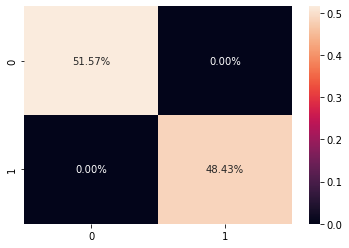

In [49]:
tree_conf_matrix = confusion_matrix(y_test, y_tree_pred)
sns.heatmap(tree_conf_matrix / np.sum(tree_conf_matrix), annot=True, fmt = '0.2%')

**6. Create a visualization of the decision tree.**

In [50]:
# Create DOT data
dot_data = tree.export_graphviz(decisiontree, out_file = None, feature_names = X_encoded.columns, class_names = y['class'])

In [51]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

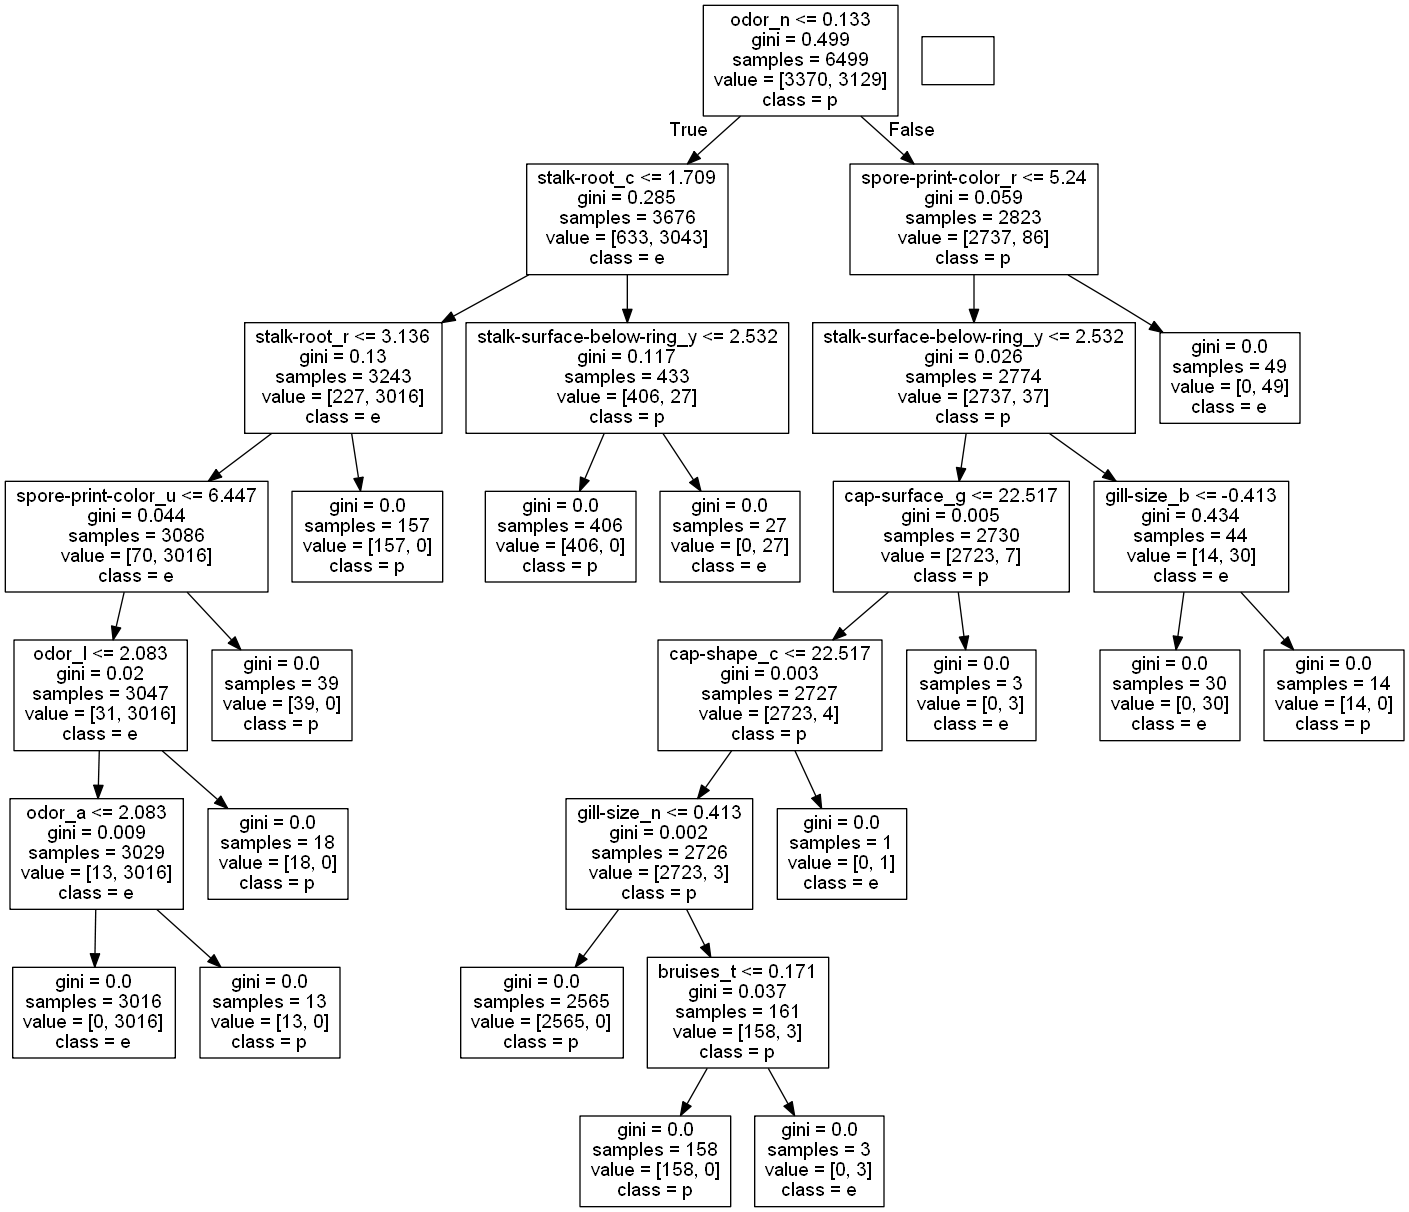

In [52]:
# Show graph
Image(graph.create_png())

**7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).**

In [53]:
chi2_selector = SelectKBest(chi2, k = 5)

In [54]:
features_kbest = chi2_selector.fit_transform(X_encoded, y['class'])

**8. Which five features were selected in step 7? Hint: Use the get_support function.**

In [55]:
best5 = chi2_selector.get_support(indices = True)
best5

array([24, 27, 37, 57, 61], dtype=int64)

**9. Repeat steps 4 and 5 with the five best features selected in step 7.**

In [56]:
decisiontree_best = DecisionTreeClassifier(random_state = 0, max_features = 5, criterion = 'entropy', splitter = 'best')
decisiontree_model_best = decisiontree_best.fit(X_train, y_train)

In [57]:
y_tree_pred_best = decisiontree_model_best.predict(X_test)
mushroom_tree_score = decisiontree_model_best.score(X_test, y_tree_pred_best)

print(f"Decision Tree accuracy: {mushroom_tree_score}")

Decision Tree accuracy: 1.0


In [60]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_tree_pred_best), labels=[0, 1]).ravel()

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

True Positive: 785
True Negative: 838
False Positive: 0
False Negative: 2


<AxesSubplot:>

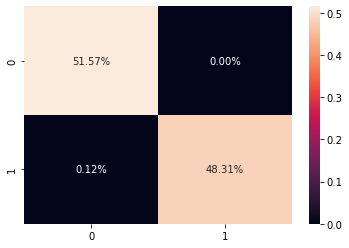

In [58]:
tree_conf_matrix = confusion_matrix(y_test, y_tree_pred_best)
sns.heatmap(tree_conf_matrix / np.sum(tree_conf_matrix), annot=True, fmt = '0.2%')

**10. Summarize your findings.**

Looking at both confusion matrices it seems that using just the five features lowered the True Positives by 2 and added them to the False negatives. For eating mushrooms of unknown edibility I think I will go with the 5 features just to be sure.  I understand the false negative it editable but I would rather side on the cautious side.